In [2]:
#Import libaries 
import pandas as pd
from itertools import repeat
import re
import numpy as np 
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from statsmodels.stats.weightstats import ztest as ztest
import statsmodels.api as sm
from scipy import stats

# set directoru 
#os.getcwd()
os.chdir('/Users/Sofie/Disney Thesis')

# import clean scripts (non-binary incl. no_gender + group)
all_scripts = pd.read_pickle("all_scripts_cleaned_total_nonbinary.pickle")

# Descriptive Analysis of Disney Movies - Analysis of Spech Length

Save number of lines for each character for all movies 

**Line count and word count for all unique characters**

In [3]:
# save number of lines 
lines = all_scripts.groupby(["Era", "Movie", "Gender", "Character"]).count()['Line'].to_frame().reset_index()
# save number of words
words = all_scripts.groupby(["Era", "Movie", "Gender", "Character"]).sum()['Words_n'].to_frame().reset_index()

# add to same dataset 
lines['Words_n'] = words['Words_n']
# avg. word pr. line 
lines['Words_pr_line'] = lines['Words_n']/lines['Line'].round()

Mean of lines and words for for gender roles including words per sentence across all movies

In [4]:
# all movies in total
# sum lines and words in total
total = lines[['Line', 'Words_n']].sum()

# sum lines and words for each gender
lines_sum = lines.groupby(['Gender'])[['Line', 'Words_n']].sum()
roles_count = lines.groupby(['Gender'])[['Line']].count().reset_index()
lines_sum['Roles'] = list(roles_count['Line'])

#lines_sum.loc['Total'] = [total['Line'], total['Words_n'], roles_count['Line'].sum()]
lines_sum = lines_sum.reset_index()

# Get the means for each gender 
lines_mean = lines.groupby(['Gender'])[['Line', 'Words_n', 'Words_pr_line']].mean().reset_index()

## Across All Movies

In [5]:
lines_sum.groupby('Gender').Roles.sum()

Gender
Female           647
Group            154
Male            1429
Non-gendered     226
Name: Roles, dtype: int64

In [6]:
# sort number of lines descending 
lines_sum = lines_sum.sort_values('Line', ascending=False)

#sort mean dataframe the same way
df_mapping = pd.DataFrame({'order': ['Male', 'Female', 'Non-gendered', 'Group']})
sort_mapping = df_mapping.reset_index().set_index('order')
lines_mean['order'] = lines_mean['Gender'].map(sort_mapping['index'])
lines_mean = lines_mean.sort_values('order')

Figure 1: Distribution of Speech

In [7]:
# Set colors
colors = ["#3e1e58", "#fce43c", "#98c862", "#4c8e70"]

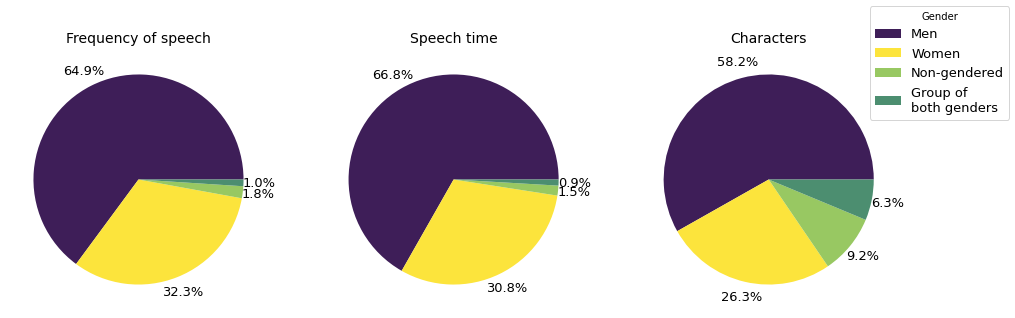

In [8]:
# setting pie chart args 
pie_chart_args = {"colors" : colors,
                  "autopct" : '%1.1f%%',
                  "pctdistance" : 1.15,
                  "textprops" : {'fontsize': 13}}

# plot figure of subplots 
fig1, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize = (16, 5))
ax1.pie(lines_sum['Line'], **pie_chart_args)
ax1.set_title("Frequency of speech", fontsize = 14)

ax2.pie(lines_sum['Words_n'], **pie_chart_args)
ax2.set_title("Speech time", fontsize = 14)

ax3.pie(lines_sum['Roles'], **pie_chart_args)
ax3.set_title("Characters", fontsize = 14)


#handles, labels = ax3.get_legend_handles_labels()
fig1.legend(["Men", "Women", "Non-gendered", "Group of\nboth genders"], title = "Gender", loc='upper right', fontsize = 13)
fig1.savefig("Figures_descriptiveanalysis/Figure_01.png", bbox_inches='tight')

In [9]:
# perform chisquare test between distribution between men and women (Speech + characters)

# importing packages
import scipy.stats as stats
import numpy as np
  
variables = list(lines_sum.columns[1:]) 
    
results = []
for var in variables:
    observed_data = lines_sum[:2][var]
    expected_data = [sum(lines_sum[:2][var]) / 2] * 2
    #perform Chi-Square Goodness of Fit T
    results.append(stats.chisquare(f_obs=observed_data, f_exp=expected_data))

df_result = pd.DataFrame()
df_result["variable"] = variables
df_result["chi_test"] = results

In [10]:
print("Words in total: ", lines_sum.Words_n.sum())
print("Lines in total: ", lines_sum.Line.sum())

Words in total:  404489
Lines in total:  43747


In [11]:
lines_sum

,Gender,Line,Words_n,Roles
2,Male,28382,270089,1429
0,Female,14113,124497,647
3,Non-gendered,804,6149,226
1,Group,448,3754,154


In [12]:
df_result

,variable,chi_test
0,Line,"(4791.254524061655, 0.0)"
1,Words_n,"(53719.67191942948, 0.0)"
2,Roles,"(294.5684007707129, 5.025386288898127e-66)"


In [13]:
lines_mean['Gender'] = ['Men', 'Women', 'Non-gendered', "Group"]
lines_mean

,Gender,Line,Words_n,Words_pr_line,order
2,Men,19.861442,189.005598,9.962185,0
0,Women,21.812983,192.421947,9.088492,1
3,Non-gendered,3.557522,27.207965,7.798227,2
1,Group,2.909091,24.376623,9.571715,3


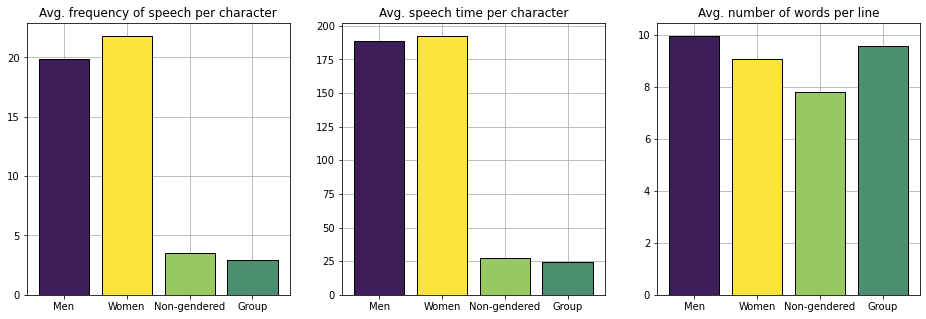

In [14]:
# plot average of speech acts 

plt.figure(figsize=(16, 5))

plt.subplot(131)
plt.bar(lines_mean['Gender'], lines_mean['Line'], edgecolor='black', color = colors, zorder = 3)
plt.grid(True)
plt.title('Avg. frequency of speech per character')

plt.subplot(132)
plt.bar(lines_mean['Gender'], lines_mean['Words_n'],  edgecolor='black', color = colors, zorder = 3)
plt.grid(True)
plt.title('Avg. speech time per character')

plt.subplot(133)
plt.bar(lines_mean['Gender'], lines_mean['Words_pr_line'],  edgecolor='black', color = colors, zorder = 3)
plt.grid(True)
plt.title('Avg. number of words per line')

#plt.suptitle('Figure #2 - Average Gendered Speech Across All Movies')

plt.savefig('Figures_descriptiveanalysis/Figure_02.png', bbox_inches='tight')

plt.show()

In [15]:
#testing significance gender by share of lines by using a z-test 
male_lines   = lines[lines["Gender"] == "Male"]['Line']
female_lines = lines[lines["Gender"] == "Female"]['Line']
ztest(male_lines, female_lines , value=0) 

(-0.9219474731096114, 0.3565559749262013)

In [16]:
#testing significance gender by share of words by using a z-test 
male_words = lines[lines["Gender"] == "Male"]['Words_n']
female_words = lines[lines["Gender"] == "Female"]['Words_n']
ztest(male_words, female_words, value=0) 

(-0.18085059664587638, 0.8564848474706284)

In [17]:
#testing significance - avg. number of words per line
male_words = lines[lines["Gender"] == "Male"]['Words_pr_line']
female_words = lines[lines["Gender"] == "Female"]['Words_pr_line']
ztest(male_words, female_words , value=0) 

(1.3233980474014126, 0.18570304080190603)

In [18]:
lines_f = lines[lines["Gender"] == "Female"]
lines_m = lines[lines["Gender"] == "Male"]
lines_f.describe(), lines_m.describe()

(             Line      Words_n  Words_pr_line
 count  647.000000   647.000000     647.000000
 mean    21.812983   192.421947       9.088492
 std     48.250642   401.861562       8.277453
 min      1.000000     1.000000       1.000000
 25%      1.000000    10.000000       5.000000
 50%      4.000000    39.000000       7.250000
 75%     17.500000   193.500000      10.708333
 max    596.000000  3929.000000     102.000000,
               Line      Words_n  Words_pr_line
 count  1429.000000  1429.000000    1429.000000
 mean     19.861442   189.005598       9.962185
 std      42.953826   397.195461      15.840611
 min       1.000000     1.000000       1.000000
 25%       1.000000     7.000000       4.500000
 50%       4.000000    29.000000       7.250000
 75%      18.000000   170.000000      11.000000
 max     494.000000  3866.000000     312.000000)

The distribution of speech between Men and Women

In [19]:
# create a dataset with only the female and male speech 
gender = ["Male", "Female"]
lines_binary = lines.loc[lines['Gender'].isin(gender)]

In [20]:
# find percentages of female and male lines and  words for each movie

# percentages of lines for each gender
lines_pct = lines_binary.groupby(["Movie", "Gender"])\
.agg({"Line" : "sum"})\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.sort_values(by=["Movie", "Gender","Line"], ascending=[True, True, False])
lines_pct = lines_pct.reset_index()
lines_pct = lines_pct.loc[lines_pct['Gender'].isin(gender)]

# percentages of words for each gender
words_pct = lines_binary.groupby(["Movie", "Gender"])\
.agg({"Words_n" : "sum"})\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.sort_values(by=["Movie", "Gender","Words_n"], ascending=[True, True, False])
words_pct = words_pct.reset_index()
words_pct = words_pct.loc[words_pct['Gender'].isin(gender)]

In [21]:
lines_pct.groupby("Gender").describe()

Line                                                         \
       count       mean        std        min        25%        50%   
Gender                                                                
Female  62.0  33.152442  19.110003   1.764706  19.331266  26.858857   
Male    62.0  66.847558  19.110003  21.339713  52.536475  73.141143   

                              
              75%        max  
Gender                        
Female  47.463525  78.660287  
Male    80.668734  98.235294

In [22]:
words_pct.groupby("Gender").describe()

Words_n                                                         \
         count       mean        std        min        25%        50%   
Gender                                                                  
Female    62.0  31.614105  19.081566   1.140511  16.748981  23.574218   
Male      62.0  68.385895  19.081566  24.422391  54.151682  76.425782   

                              
              75%        max  
Gender                        
Female  45.848318  75.577609  
Male    83.251019  98.859489

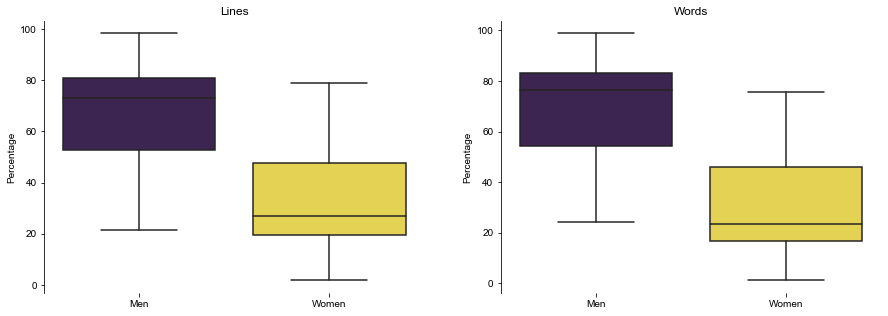

In [23]:
# find percentages of female and male lines and  words for each movie

# take word count and line count for females + males and create into dataframe ready to plot  
words_count_f = list(words_pct.loc[(words_pct['Gender'] == "Female")]['Words_n'])
lines_count_f = list(lines_pct.loc[(lines_pct['Gender'] == "Female")]['Line'])
words_count_m = list(words_pct.loc[(words_pct['Gender'] == "Male")]['Words_n'])
lines_count_m = list(lines_pct.loc[(lines_pct['Gender'] == "Male")]['Line'])

# merge the lists into on
total_count_words = words_count_m + words_count_f #female
total_count_lines = lines_count_m + lines_count_f #male 

# make a list to distinguish between the types of speech
words_name = ["Men"]   * 62 # create a list with words
lines_name = ["Women"] * 62 # create a list with lines
x_genders = words_name + lines_name # merge the list into one 

# create into data frame whereas it can be plotted 
per_gender = {'gender': x_genders ,'lines':total_count_lines, 'words':total_count_words}
per_gender = pd.DataFrame(per_gender)

# plot subplots (one for each gender)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))

#fig.suptitle('Figure #4 - Deviation of Share of Gendered Speech Across All Movies')
ax1.set_title('Lines')
ax2.set_title('Words')

sns.set_style("whitegrid")
ax1 = sns.boxplot(ax = ax1, x = "gender", y = "lines", data = per_gender, palette = colors)
ax2 = sns.boxplot(ax = ax2, x = "gender", y = "words", data = per_gender, palette = colors)
sns.despine(bottom = True)

ax1.set(xlabel = None, ylabel = "Percentage")
ax2.set(xlabel = None, ylabel = "Percentage")

plt.savefig("Figures_descriptiveanalysis/Figure_03", bbox_inches='tight')

## All movies

In [24]:
# inspect lines count and words count for all movies divided on gender
lines.groupby(['Movie', 'Gender'])[['Line', 'Words_n']].sum()

Line  Words_n
Movie          Gender                     
A Bug's life   Female         116     1214
               Male           170     2245
               Non-gendered    16       88
Aladdin        Female         170     1474
               Group           14      101
...                           ...      ...
Wreck-It Ralph Male           701     6400
Zootopia       Female         431     4394
               Group            1        1
               Male           442     5182
               Non-gendered     5       35

[217 rows x 2 columns]

In [25]:
# Inspect mean of lines and words for female roles including mean words 
#per sentence for all movies
lines.groupby(['Movie', 'Gender'])[['Line', 'Words_n', 'Words_pr_line']].mean()

Line     Words_n  Words_pr_line
Movie          Gender                                            
A Bug's life   Female        14.500000  151.750000      10.031916
               Male          10.000000  132.058824       9.416354
               Non-gendered   1.777778    9.777778       4.527778
Aladdin        Female        24.285714  210.571429      18.845333
               Group          4.666667   33.666667       8.455556
...                                ...         ...            ...
Wreck-It Ralph Male          29.208333  266.666667       8.237561
Zootopia       Female        15.962963  162.740741       8.560787
               Group          1.000000    1.000000       1.000000
               Male           8.840000  103.640000       9.202036
               Non-gendered   2.500000   17.500000       7.375000

[217 rows x 3 columns]

In [26]:
# read in data to get year information
data = pd.read_pickle("scripts_clean_final_27apr.pickle")

In [27]:
# merge year on data with procent 
data_year = data[['Movie', 'Year', 'Gender_main_character']]
lines_pct = pd.merge(lines_pct, data_year, on=['Movie'])
words_pct = pd.merge(words_pct, data_year, on=['Movie'])

In [28]:
# get gender proportion of roles 

lines_roles = lines_binary.groupby(['Movie', 'Gender', ])[['Line', 'Words_n']].sum()
roles_count = lines_binary.groupby(['Movie', 'Gender'])[['Line']].count().reset_index()
lines_roles['Roles'] = list(roles_count['Line'])

# percentages of roles for each gender
roles_pct = lines_roles.groupby(["Movie", "Gender"])\
.agg({"Roles" : "sum"})\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.sort_values(by=["Movie", "Gender","Roles"], ascending=[True, True, False])
roles_pct = roles_pct.reset_index()

roles_pct = pd.merge(roles_pct, data_year, on = ['Movie'])

In [29]:
#line plot 
ys_1 = lines_pct[lines_pct['Gender'] == "Female"]#['Line']#.sort_values(by=['Year'])
ys_2 = words_pct[words_pct['Gender'] == "Female"]#['Words_n']#.sort_values(by=['Year'])
ys_3 = roles_pct[roles_pct['Gender'] == "Female"]#['Roles']#.sort_values(by=['Year'])

In [30]:
female_representation_df = pd.merge(ys_1, ys_2, on=['Movie', 'Gender', 'Year', 'Gender_main_character'])
female_representation_df = pd.merge(female_representation_df, ys_3, on=['Movie', 'Gender', 'Year', 'Gender_main_character'] )

In [31]:
female_representation_df_by_year = female_representation_df.sort_values(by=['Year'])
female_df = female_representation_df.sort_values(by=['Roles'])

<ipython-input-32-37dea366210e>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(female_df['Movie'], rotation=90)


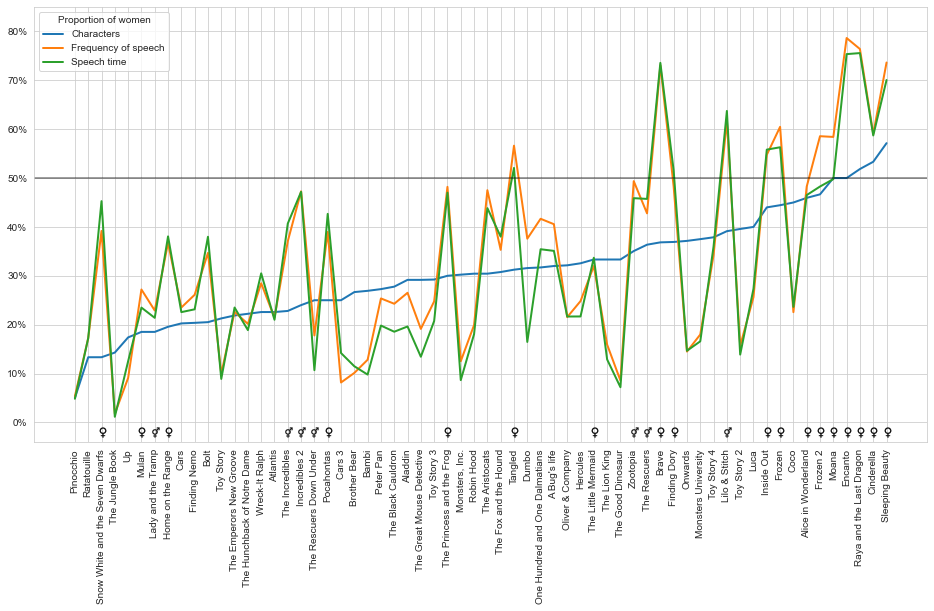

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (16,8))

# plotting
ax.plot(female_df['Movie'], female_df['Roles'], label = "Roles", linewidth=2)
ax.plot(female_df['Movie'], female_df['Line'], label = "Lines", linewidth=2)
ax.plot(female_df['Movie'], female_df['Words_n'], label = "Words", linewidth=2)

# plotting gender of main characters
for _, row in female_df.iterrows():
    if row["Gender_main_character"] == "Female":
        # TODO: find ud af, om vi kan placere text-symboler korrekt.
        # ax.text(row["Movie"], -1, s = "$\u2640$")
        ax.scatter(row["Movie"], -2, marker = "$\u2640$", linewidths = 0.2, s = 100, color = "black")
    elif row["Gender_main_character"] == "Both genders":
        # ax.text(row["Movie"], -1, s = "$\u26a5$")
        ax.scatter(row["Movie"], -2, marker = "$\u26a5$", linewidths = 0.2, s = 100, color = "black")

ax.set_xticklabels(female_df['Movie'], rotation=90)
ax.axhline(50, color = "black", alpha = 0.5)

# formatting
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.
ax.set_facecolor("white")
ax.set_ylim([-4, 85])

ax.grid(True)
ax.legend(["Characters", "Frequency of speech", "Speech time"], loc = "upper left", title = "Proportion of women")
plt.savefig("Figures_descriptiveanalysis/Figure_04", bbox_inches='tight')

In [33]:
main_char = []
for gender in female_df['Gender_main_character']:
    if gender == "Male":
        main_char.append("Man")
    else:
        main_char.append("Woman")
female_df['Gender_main_character_extra'] = main_char

In [35]:
#sofi se her
female_df.groupby("Gender_main_character_extra")['Words_n'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender_main_character_extra,,,,,,,,
Man,37.0,20.025525,10.028264,1.140511,13.432155,18.884813,23.504274,43.843745
Woman,25.0,48.765203,16.159585,10.684411,42.670633,47.187656,56.302349,75.577609


In [36]:
#testing significance share of WOMEN AS MAIN CHARACTER AND FEMALE LINES

male_line_pct_test = female_df.query('Gender_main_character_extra == "Man"')['Line']
male_line_pct_test = sm.stats.DescrStatsW(male_line_pct_test)
female_line_pct_test = female_df.query('Gender_main_character_extra == "Woman"')['Line']
female_line_pct_test = sm.stats.DescrStatsW(female_line_pct_test)
sm.stats.CompareMeans(male_line_pct_test, female_line_pct_test).ztest_ind(usevar='unequal',value=0)

(-7.556370332157408, 4.1447268921614826e-14)

In [37]:
#testing significance share of WOMEN AS MAIN CHARACTER AND FEMALE WORDS

male_word_pct_test = female_df.query('Gender_main_character_extra == "Man"')['Words_n']
male_word_pct_test = sm.stats.DescrStatsW(male_word_pct_test)
female_word_pct_test = female_df.query('Gender_main_character_extra == "Woman"')['Words_n']
female_word_pct_test = sm.stats.DescrStatsW(female_word_pct_test)
sm.stats.CompareMeans(male_word_pct_test, female_word_pct_test).ztest_ind(usevar='unequal',value=0)

(-7.9213586820299575, 2.3492916180769706e-15)

In [38]:
#testing significance share of WOMEN AS MAIN CHARACTER AND FEMALE Roles

male_roles_pct_test = female_df.query('Gender_main_character_extra == "Man"')['Roles']
male_roles_pct_test = sm.stats.DescrStatsW(male_roles_pct_test)
female_roles_pct_test = female_df.query('Gender_main_character_extra == "Woman"')['Roles']
female_roles_pct_test = sm.stats.DescrStatsW(female_roles_pct_test)
sm.stats.CompareMeans(male_roles_pct_test, female_roles_pct_test).ztest_ind(usevar='unequal',value=0)

(-2.7299737724475572, 0.006333936445831663)

Showing top movies with most male/female speech (either lines or words)

In [39]:
ave_speech = lines_binary.groupby(['Movie', 'Gender']).mean(['Line', 'Words_n']).reset_index()
ave_speech = pd.merge(ave_speech, data_year, on=['Movie'])
ave_speech = ave_speech.sort_values(by=['Year'])
ave_speech

ave_speech_m = ave_speech.loc[ave_speech['Gender'] == "Male"]
#ave_speech_m['Line'] = ave_speech_m['Line']/-1
ave_speech_f = ave_speech.loc[ave_speech['Gender'] == "Female"]

In [40]:
ave_speech_f.drop(['Gender', 'Gender_main_character', 'Words_pr_line'], axis=1, inplace = True)
ave_speech_f.rename(columns = {'Line':'Avg_lines_f', 'Words_n':'Avg_words_f'}, inplace = True)

ave_speech_m.drop(['Gender', 'Gender_main_character', 'Words_pr_line'], axis=1, inplace = True)
ave_speech_m.rename(columns = {'Line':'Avg_lines_m', 'Words_n':'Avg_words_m'}, inplace = True)


/Users/Sofie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/Sofie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [41]:
ave_speech = pd.merge(ave_speech_m, ave_speech_f, on = ["Movie", "Year"])
ave_speech = ave_speech[['Movie', 'Year', 'Avg_lines_m', 'Avg_lines_f', 
                         'Avg_words_m', 'Avg_words_f']]
ave_speech['Avg_words_m'] = ave_speech['Avg_words_m'].round(1)
ave_speech['Avg_words_f'] = ave_speech['Avg_words_f'].round(1)
ave_speech['Avg_lines_f'] = ave_speech['Avg_lines_f'].round(1)
ave_speech['Avg_lines_m'] = ave_speech['Avg_lines_m'].round(1)

In [42]:
# TODO: save to appendix
ave_speech.describe()

,Year,Avg_lines_m,Avg_lines_f,Avg_words_m,Avg_words_f
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1994.161290,22.079032,25.845161,220.591935,232.961290
std,23.904313,11.350426,21.596749,124.169359,168.338393
min,1937.000000,6.100000,3.300000,72.700000,24.000000
25%,1985.250000,13.825000,14.525000,129.850000,128.475000
50%,2001.000000,20.300000,19.450000,186.300000,192.650000
75%,2012.750000,27.325000,33.075000,269.175000,309.075000
max,2021.000000,69.200000,137.600000,665.000000,905.500000


In [43]:
all_scripts.loc[all_scripts['Era'] == "Present period"]['Movie'].unique()#.groupby['Era']

array(['Onwards', 'Encanto', 'Luca', 'Raya and the Last Dragon'],
      dtype=object)

## Across Eras 

In [44]:
lines.groupby(['Era','Gender']).describe()

Line                                  \
                                     count       mean        std  min  25%   
Era                    Gender                                                
Post Renaissance Era   Female        117.0  23.769231  39.523538  1.0  2.0   
                       Group          43.0   3.116279   3.935246  1.0  1.0   
                       Male          395.0  19.835443  49.022017  1.0  1.0   
                       Non-gendered   65.0   1.661538   1.349501  1.0  1.0   
Present period         Female         60.0  28.266667  62.374720  1.0  1.0   
                       Group          14.0   2.500000   2.821620  1.0  1.0   
                       Male           75.0  25.426667  66.821499  1.0  1.0   
                       Non-gendered   18.0   1.500000   1.248529  1.0  1.0   
The Bronze Age         Female         51.0  21.196078  24.362282  1.0  3.0   
                       Group           8.0   3.500000   4.407785  1.0  1.0   
                       Male          111.0  22.207207  30.098661  1.0  2.0   
                       Non-gendered   11.0  20.909091  36.153712  1.0  1.5   
The Disney Renaissance Female         88.0  16.897727  27.527641  1.0  2.0   
                       Group          31.0   2.838710   2.829567  1.0  1.0   
                       Male          216.0  23.921296  40.799206  1.0  1.0   
                       Non-gendered   42.0   4.952381   8.528152  1.0  1.0   
The Golden Age         Female         83.0  20.710843  35.192339  1.0  2.0   
                       Group          24.0   3.541667   3.243444  1.0  1.0   
                       Male          182.0  18.230769  26.238000  1.0  1.0   
                       Non-gendered   33.0   2.666667   2.495830  1.0  1.0   
The Revival Era        Female        248.0  21.568548  60.055670  1.0  1.0   
                       Group          34.0   2.294118   1.915320  1.0  1.0   
                       Male          450.0  17.088889  41.273234  1.0  1.0   
                       Non-gendered   57.0   2.508772   3.751775  1.0  1.0   

                                                        Words_n              \
                                      50%    75%    max   count        mean   
Era                    Gender                                                 
Post Renaissance Era   Female         7.0  28.00  203.0   117.0  216.042735   
                       Group          1.0   3.00   20.0    43.0   17.000000   
                       Male           3.0  12.00  494.0   395.0  171.691139   
                       Non-gendered   1.0   2.00    8.0    65.0   13.569231   
Present period         Female         4.0  16.25  387.0    60.0  230.433333   
                       Group          1.0   3.25   10.0    14.0   14.928571   
                       Male           3.0  12.00  359.0    75.0  207.160000   
                       Non-gendered   1.0   1.00    6.0    18.0    7.388889   
The Bronze Age         Female        10.0  34.00   94.0    51.0  202.352941   
                       Group          1.0   3.75   12.0     8.0   23.875000   
                       Male           8.0  31.50  153.0   111.0  246.495495   
                       Non-gendered   6.0  23.00  122.0    11.0  145.727273   
The Disney Renaissance Female         4.5  15.25  129.0    88.0  169.761364   
                       Group          2.0   3.00   12.0    31.0   21.322581   
                       Male           5.0  34.00  293.0   216.0  258.254630   
                       Non-gendered   2.0   4.00   40.0    42.0   29.452381   
The Golden Age         Female         6.0  23.00  215.0    83.0  194.903614   
                       Group          3.0   4.25   12.0    24.0   59.000000   
                       Male           6.0  25.75  172.0   182.0  205.005495   
                       Non-gendered   1.0   3.00    9.0    33.0   37.969697   
The Revival Era        Female         3.0  11.25  596.0   248.0  177.250000   
                       Group       

In [45]:
# see differences in male and female speech (line count, word count, words per line)

#choose all genders, but not groups 
gender_all = ['Male', 'Female']

eras = lines.groupby(['Era', 'Gender'])[['Line', 'Words_n']].sum().reset_index()
eras = eras.loc[eras['Gender'].isin(gender_all)]
eras

,Era,Gender,Line,Words_n
0,Post Renaissance Era,Female,2781,25277
2,Post Renaissance Era,Male,7835,67818
4,Present period,Female,1696,13826
6,Present period,Male,1907,15537
8,The Bronze Age,Female,1081,10320
10,The Bronze Age,Male,2465,27361
12,The Disney Renaissance,Female,1487,14939
14,The Disney Renaissance,Male,5167,55783
16,The Golden Age,Female,1719,16177
18,The Golden Age,Male,3318,37311


In [46]:


# count share of each gender

#lines
eras_pct = eras.groupby(["Era", "Gender"])\
.agg({"Line" : "sum"})\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.sort_values(by=["Era", "Gender","Line"], ascending=[True, True, False])
eras_pct = eras_pct.reset_index()
eras_pct

#words
eras_words_pct = eras.groupby(["Era", "Gender"])\
.agg({"Words_n" : "sum"})\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.sort_values(by=["Era", "Gender","Words_n"], ascending=[True, True, False])
eras_words_pct = eras_words_pct.reset_index()


#roles
eras_roles_pct = lines.loc[lines['Gender'].isin(gender_all)]
eras_roles_pct = eras_roles_pct.groupby(["Era", "Gender"])\
.agg({"Character" : "count"})\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.sort_values(by=["Era", "Gender","Character"], ascending=[True, True, False])
eras_roles_pct = eras_roles_pct.reset_index()


In [47]:
#line plot 
ys_era_1 = eras_pct[eras_pct['Gender'] == "Female"]#['Line']#.sort_values(by=['Year'])
ys_era_2 = eras_words_pct[eras_words_pct['Gender'] == "Female"]#['Words_n']#.sort_values(by=['Year'])
ys_era_3 = eras_roles_pct[eras_roles_pct['Gender'] == "Female"]#['Roles']#.sort_values(by=['Year'])

female_era_df = pd.merge(ys_era_1, ys_era_2, on=['Era', 'Gender'])
female_era_df = pd.merge(female_era_df, ys_era_3, on=['Era', 'Gender'] )

#re-index in cronological order
female_era_df = female_era_df.reindex([4, 2, 3, 0, 5, 1]).reset_index(drop=True)

<ipython-input-48-ecee4ed24a61>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(female_era_df['Era'], rotation=10)


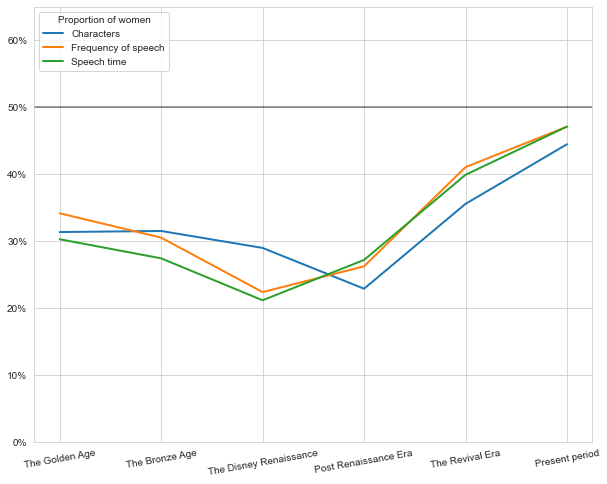

In [48]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))

# plotting
ax.plot(female_era_df['Era'], female_era_df['Character'], 
        label = "Characters", linewidth = 2)
ax.plot(female_era_df['Era'], female_era_df['Line'], 
        label = "Frequency of speech", linewidth = 2)
ax.plot(female_era_df['Era'], female_era_df['Words_n'], 
        label = "Speech time", linewidth = 2)


ax.set_xticklabels(female_era_df['Era'], rotation=10)
ax.axhline(50, color = "black", alpha = 0.5)

# formatting
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.
ax.set_facecolor("white")
ax.set_ylim([0, 65])

ax.grid(True)
ax.legend(loc = "upper left", title="Proportion of women")
plt.savefig("Figures_descriptiveanalysis/Figure_05", bbox_inches='tight')

In [49]:
eras_words_pct

,Era,Gender,Words_n
0,Post Renaissance Era,Female,27.151834
1,Post Renaissance Era,Male,72.848166
2,Present period,Female,47.086469
3,Present period,Male,52.913531
4,The Bronze Age,Female,27.387808
5,The Bronze Age,Male,72.612192
6,The Disney Renaissance,Female,21.123554
7,The Disney Renaissance,Male,78.876446
8,The Golden Age,Female,30.244167
9,The Golden Age,Male,69.755833


In [50]:
# to do - test anova 
import pingouin as pg

#Testing the impact of era on female speech and characters 
anova_lines = pg.anova(data=female_era_df, dv='Line', between='Era', detailed=True)
anova_words = pg.anova(data=female_era_df, dv='Words_n', between='Era', detailed=True)
anova_roles = pg.anova(data=female_era_df, dv='Character', between='Era', detailed=True)
anova_lines

/Users/Sofie/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:949: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2
/Users/Sofie/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:949: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2
/Users/Sofie/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:949: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2


,Source,SS,DF,MS,np2
0,Era,427.989004,5,85.597801,1.0
1,Within,0.000000,0,NaN,NaN


In [51]:
eras

,Era,Gender,Line,Words_n
0,Post Renaissance Era,Female,2781,25277
2,Post Renaissance Era,Male,7835,67818
4,Present period,Female,1696,13826
6,Present period,Male,1907,15537
8,The Bronze Age,Female,1081,10320
10,The Bronze Age,Male,2465,27361
12,The Disney Renaissance,Female,1487,14939
14,The Disney Renaissance,Male,5167,55783
16,The Golden Age,Female,1719,16177
18,The Golden Age,Male,3318,37311


In [52]:
# slet 
#testing significance share of Era on gender
Male_era   = eras[eras["Gender"] == "Male"]['Words_n']
Female_era = eras[eras["Gender"] == "Female"]['Words_n']
from scipy import stats
res11 = stats.ttest_ind(Male_era, Female_era, 
                        equal_var=True)
display(res11)

Ttest_indResult(statistic=2.3876279996235796, pvalue=0.03811269926451643)

## Most Speaking Characters

Finding the most speaking characters (both men and women)

- most lines
- most words

In [53]:
# find characters using the largest share of lines
top_lines = lines.groupby(["Movie", "Gender", "Character"])\
                  .agg({"Line" : "sum"})\
                  .groupby(level = 0).apply(lambda x: 100*x/x.sum())\
                  .sort_values(by = ["Movie", "Gender", "Line"],
                               ascending = [True, True, False])\
                  .reset_index()

# find characters using the largest share of words 
top_words = lines.groupby(["Movie", "Gender", "Character"])\
                  .agg({"Words_n" : "sum"})\
                  .groupby(level = 0).apply(lambda x: 100*x/x.sum())\
                  .sort_values(by = ["Movie", "Gender", "Words_n"],
                               ascending = [True, True, False])\
                  .reset_index()

In [54]:
# find the most speaking female and male character (lines)
top_lines_f = top_lines.loc[top_lines['Gender'] == "Female"].groupby('Movie').head(1)
top_lines_m = top_lines.loc[top_lines['Gender'] == "Male"].groupby('Movie').head(1)
top_lines_f = top_lines_f.rename(columns={'Gender': 'F_most_lines', 'Character': 'F_Character_most_lines', 'Line': 'F_Most_lines_sum'})
top_lines_m = top_lines_m.rename(columns={'Gender': 'M_most_lines', 'Character': 'M_Character_most_lines', 'Line': 'M_Most_lines_sum'})

# find the most speaking female and male character (words)
top_words_f = top_words.loc[top_words['Gender'] == "Female"].groupby('Movie').head(1)
top_words_m = top_words.loc[top_words['Gender'] == "Male"].groupby('Movie').head(1)
top_words_f = top_words_f.rename(columns={'Gender': 'F_most_words', 'Character': 'F_Character_most_words', 'Words_n': 'F_Most_words_sum'})
top_words_m = top_words_m.rename(columns={'Gender': 'M_most_words', 'Character': 'M_Character_most_words', 'Words_n': 'M_Most_words_sum'})

In [55]:
# merge most speaking character information into one dataframe 
df_top_l = pd.merge(top_lines_m, top_lines_f, on=['Movie'])
df_top_w = pd.merge(top_words_m, top_words_f, on=['Movie'])
df_top = pd.merge(df_top_w, df_top_l, on=['Movie'])

In [56]:
df_top = df_top.drop(["M_most_words", "F_most_words", "F_most_lines", "M_most_lines"], 
                     axis=1)

In [57]:
# find hvilken gender der snakker mest for hver film
# find forskellen 

most_speaking_words = []
most_speaking_lines = []
dif_words = []
dif_lines = []
#g_most_speaking = []
#less_speaking = []
#g_less_speaking = []

for index, row in df_top.iterrows():
    if row['M_Most_words_sum'] > row['F_Most_words_sum']:
        most_speaking_words.append('Men')
        dif_words.append(row['M_Most_words_sum']-row['F_Most_words_sum'])
    else:
        most_speaking_words.append('Women')
        dif_words.append(row['F_Most_words_sum']-row['M_Most_words_sum'])

for index, row in df_top.iterrows():
    if row['M_Most_lines_sum'] > row['F_Most_lines_sum']:
        most_speaking_lines.append('Men')
        dif_lines.append(row['M_Most_lines_sum']-row['F_Most_lines_sum'])
    else:
        most_speaking_lines.append('Women')
        dif_lines.append(row['F_Most_lines_sum']-row['M_Most_lines_sum'])

df_top['most_speaking_words'] = most_speaking_words
df_top['most_speaking_lines'] = most_speaking_lines
df_top['dif_words'] = dif_words
df_top['dif_lines'] = dif_lines

df_top = pd.merge(data_year, df_top, on = ['Movie'])
df_top = df_top.sort_values(by='Year', ascending=False)
df_top

,Movie,Year,Gender_main_character,M_Character_most_words,M_Most_words_sum,F_Character_most_words,F_Most_words_sum,M_Character_most_lines,M_Most_lines_sum,F_Character_most_lines,F_Most_lines_sum,most_speaking_words,most_speaking_lines,dif_words,dif_lines
61,Raya and the Last Dragon,2021,Female,boun,8.341085,raya,30.806202,boun,9.726444,raya,32.674772,Women,Women,22.465116,22.948328
60,Luca,2021,Male,alberto,24.803625,giulia,15.634441,luca,28.751432,giulia,16.036655,Men,Men,9.169184,12.714777
59,Encanto,2021,Female,tio bruno,10.057760,mirabel,34.869412,tio bruno,6.928839,mirabel,36.235955,Women,Women,24.811652,29.307116
58,Onwards,2020,Male,barley,36.650905,laurel,10.471687,ian,33.677298,laurel,9.099437,Men,Men,26.179218,24.577861
57,Frozen 2,2019,Female,olaf,15.738069,anna,23.862375,kristoff,14.439655,anna,29.310345,Women,Women,8.124306,14.870690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Cinderella,1950,Female,grand duke,12.366298,cinderella,18.840308,jaq,10.978044,cinderella,19.161677,Women,Women,6.474010,8.183633
2,Bambi,1942,Male,owl,16.533108,thumper's mother,3.289751,bambi,21.719457,thumper's mother,3.619910,Men,Men,13.243357,18.099548
3,Dumbo,1942,Male,timothy q. mouse,31.692308,matriarch,4.923077,ringmaster,14.788732,matriarch,14.084507,Men,Men,26.769231,0.704225
1,Pinocchio,1940,Male,jiminy cricket,28.278689,blue fairy,4.704205,pinocchio,33.725490,blue fairy,5.294118,Men,Men,23.574483,28.431373


In [58]:
top_words_m = df_top.loc[df_top['most_speaking_words'] == "Men"]                     
top_words_f = df_top.loc[df_top['most_speaking_words'] == "Women"]

In [64]:
print("man as most spekaing character: ", top_words_m.shape[0])
print("woman as most spekaing character: ", top_words_f.shape[0])

man as most spekaing character:  41
woman as most spekaing character:  21


In [228]:
print("Women: ", top_words_f['F_Most_words_sum'].mean(), 
      "Men: ", top_words_m['M_Most_words_sum'].mean())

print("Women: ", top_words_f['F_Most_words_sum'].count(), 
      "Men: ", top_words_m['M_Most_words_sum'].count())

Women:  27.246320034031275 Men:  25.76184929906099
Women:  21 Men:  41


In [229]:
df_top = df_top.sort_values(["most_speaking_words"])

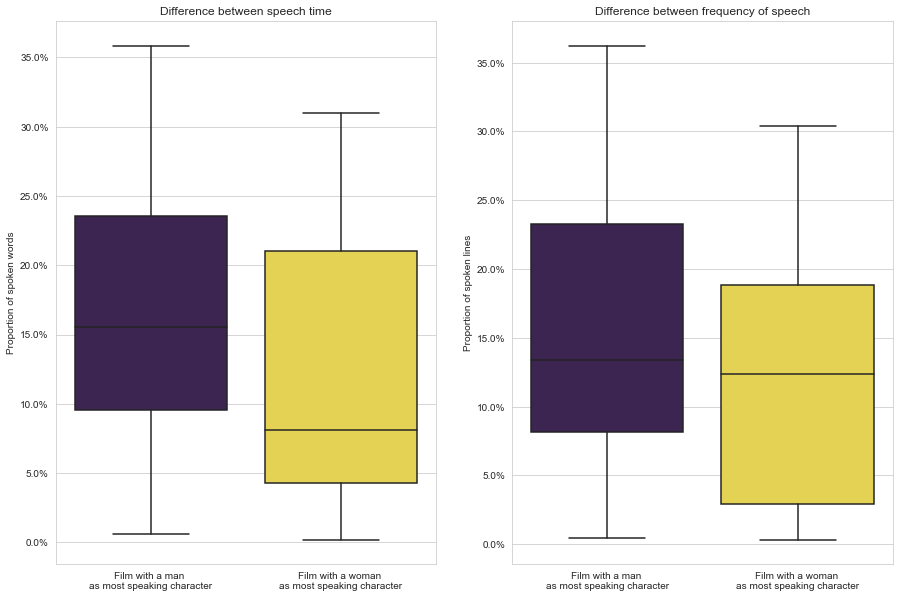

In [230]:
#figure 11 
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].set_title('Difference between speech time')
axes[1].set_title('Difference between frequency of speech')

sns.boxplot(ax=axes[0], x="most_speaking_words", y="dif_words", data=df_top, palette = colors)
axes[0].set(ylabel = "Proportion of spoken words")
axes[0].set(xlabel=None)
sns.boxplot(ax=axes[1], x="most_speaking_lines", y="dif_lines", data=df_top, palette = colors)
axes[1].set(ylabel = "Proportion of spoken lines")
axes[1].set(xlabel=None)

axes[0].yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter()) # set percentage at yaxis.


plt.sca(axes[0])
plt.xticks([0, 1], ['Film with a man \nas most speaking character', 
                    'Film with a woman \nas most speaking character'])
plt.sca(axes[1])
plt.xticks([0, 1], ['Film with a man \nas most speaking character', 
                    'Film with a woman \nas most speaking character'])

plt.savefig("Figures_descriptiveanalysis/Figure_06", bbox_inches='tight')

In [231]:
df_top.groupby('most_speaking_words').mean()

,Year,M_Most_words_sum,F_Most_words_sum,M_Most_lines_sum,F_Most_lines_sum,dif_words,dif_lines
most_speaking_words,,,,,,,
Men,1992.682927,25.761849,9.536538,24.331755,11.01501,16.225311,14.165720
Women,1997.047619,15.406081,27.246320,14.471323,27.82777,11.840239,14.149907


In [232]:
#testing significance share of most speaking character's gender and amount of speech 
# words 
male_most = df_top.query('most_speaking_words == "Men"')['M_Most_words_sum']
male_most = sm.stats.DescrStatsW(male_most)
female_most = df_top.query('most_speaking_words == "Women"')['F_Most_words_sum']
female_most = sm.stats.DescrStatsW(female_most)
sm.stats.CompareMeans(male_most, female_most).ztest_ind(usevar='unequal',value=0)

(-0.6843855884934663, 0.49373171387394776)

In [233]:
# the hypothesis: if a women speaks the most she is followed by a man speaking a lot 

#testing significance share of most speaking character's gender 
# and amount of speech for the other gender 
# words 
male_most = df_top.query('most_speaking_words == "Men"')['F_Most_words_sum']
male_most = sm.stats.DescrStatsW(male_most)
female_most = df_top.query('most_speaking_words == "Women"')['M_Most_words_sum']
female_most = sm.stats.DescrStatsW(female_most)
sm.stats.CompareMeans(male_most, female_most).ztest_ind(usevar='unequal',value=0)

(-3.6231568824290297, 0.000291029182698148)

In [234]:
#testing significance share of most speaking character's gender and amount of speech
# lines
male_most = df_top.query('most_speaking_lines == "Men"')['M_Most_lines_sum']
male_most = sm.stats.DescrStatsW(male_most)
female_most = df_top.query('most_speaking_lines == "Women"')['F_Most_lines_sum']
female_most = sm.stats.DescrStatsW(female_most)
sm.stats.CompareMeans(male_most, female_most).ztest_ind(usevar='unequal',value=0)

(-0.9756197508021051, 0.3292529332347869)

In [235]:
#testing significance share of most speaking character's gender and amount of speech
# lines
male_most = df_top.query('most_speaking_lines == "Men"')['F_Most_lines_sum']
male_most = sm.stats.DescrStatsW(male_most)
female_most = df_top.query('most_speaking_lines == "Women"')['M_Most_lines_sum']
female_most = sm.stats.DescrStatsW(female_most)
sm.stats.CompareMeans(male_most, female_most).ztest_ind(usevar='unequal',value=0)

(-3.372911699794104, 0.0007437780076325215)

In [125]:
df_top

,Movie,Year,Gender_main_character,M_Character_most_words,M_Most_words_sum,F_Character_most_words,F_Most_words_sum,M_Character_most_lines,M_Most_lines_sum,F_Character_most_lines,F_Most_lines_sum,most_speaking_words,most_speaking_lines,dif_words,dif_lines
31,"Monsters, Inc.",2001,Male,mike,38.953646,celia,3.090268,mike,28.434886,celia,4.301075,Men,Men,35.863378,24.133811
37,Cars,2006,Male,lightning mcqueen,25.441093,sally carrera,9.903244,lightning mcqueen,25.463415,sally carrera,10.536585,Men,Men,15.537849,14.926829
12,Robin Hood,1973,Male,robin hood,15.443295,maid marian,5.017800,robin hood,14.942529,maid marian,6.130268,Men,Men,10.425496,8.812261
13,The Rescuers,1977,Both genders,tyler,18.038158,penny,13.104644,tyler,20.592194,penny,12.651413,Men,Men,4.933513,7.940781
34,Brother Bear,2003,Male,kenai,26.033058,tanana,5.785124,kenai,29.478827,denahi,7.328990,Men,Men,20.247934,22.149837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,Zootopia,2016,Both genders,nick wilde,21.774865,judy hopps,29.754474,nick wilde,16.837315,judy hopps,32.878271,Women,Women,7.979609,16.040956
57,Frozen 2,2019,Female,olaf,15.738069,anna,23.862375,kristoff,14.439655,anna,29.310345,Women,Women,8.124306,14.870690
59,Encanto,2021,Female,tio bruno,10.057760,mirabel,34.869412,tio bruno,6.928839,mirabel,36.235955,Women,Women,24.811652,29.307116
18,The Little Mermaid,1989,Female,sebastian,16.501025,ursula,16.690330,triton,11.931818,ariel,19.602273,Women,Women,0.189304,7.670455


In [126]:
# save things to 07. creating key numbers for all movies

# safe lines_pct_female
lines_pct_female.to_pickle("lines_pct_female.pickle")
# safe lines_pct_male
lines_pct_male.to_pickle("lines_pct_male.pickle")

# safe words_pct_female
words_pct_female.to_pickle("words_pct_female.pickle")
# safe words_pct_male
words_pct_male.to_pickle("words_pct_male.pickle")

df_top.to_pickle("df_top.pickle")

NameError: name 'lines_pct_female' is not defined